In [269]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from yahoo_fin import stock_info as si
import numpy as np
import yfinance as yf
# import yahoo_fin


In [270]:
# help(si.get_holders)



In [271]:
sns.set_style('whitegrid')

In [272]:
%matplotlib inline

In [273]:
# %conda install -c anaconda requests

# help(si)
# !pip install yfinance

In [274]:
# si.get_holders()

In [294]:
def get_stock(ticker):
    return si.get_data(ticker)

STOCK = 'aapl'
START_DATE = '20200301'

stock = yf.Ticker(STOCK)

company_name = stock.info['longName']
print(company_name)

Apple Inc.


In [295]:
# si.get_holders(STOCK)

In [296]:


df = get_stock(STOCK)
df = df.loc[START_DATE:]
# df.head()

In [297]:
df['shortEWM'] = df.close.ewm(span=12, adjust=False).mean()
df['longEWM'] = df.close.ewm(span=26, adjust=False).mean()
df['MACD'] = df.shortEWM - df.longEWM
df['signal'] = df.MACD.ewm(span=9,adjust=False).mean()



In [298]:
def buy_sell(df):
    Buy = []
    Sell = []
    flag = -1
    
    for i in range(len(df)):
        if df['MACD'][i] > df['signal'][i]:
            Sell.append(np.NaN)
            if flag != 1:
                Buy.append(df['signal'][i])
                flag =1
            else:
                Buy.append(np.NaN)
        elif df['MACD'][i] < df['signal'][i]:
            Buy.append(np.NaN)
            if flag != 0:
                Sell.append(df['signal'][i])
                flag =0
            else:
                Sell.append(np.NaN)
        else:
            Sell.append(np.NaN)
            Buy.append(np.NaN)
    return Buy, Sell

In [299]:
BS = buy_sell(df)
df['Buy'] = BS[0]
df['Sell'] = BS[1]

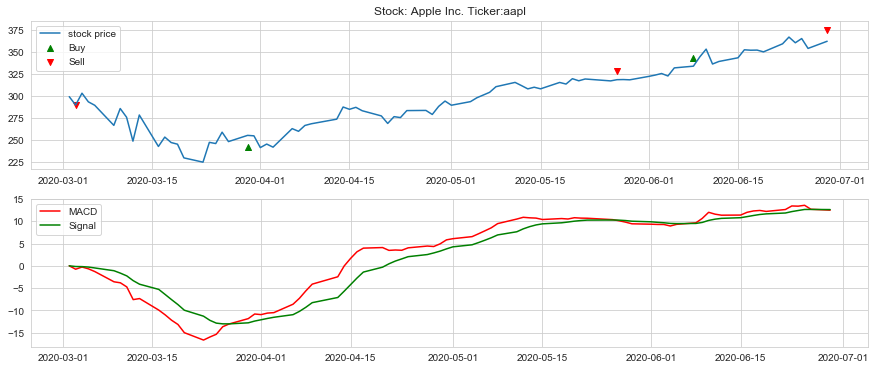

In [300]:
fig, ax = plt.subplots(2,figsize=(15,6))
ax[0].plot(df.index,df.close, label='stock price')

ax[1].plot(df.index, df.MACD, c='r', label='MACD')
ax[1].plot(df.index, df.signal, c='g', label='Signal')

ax[0].scatter(df.index, df.Buy+df.close, c='g', marker="^",label='Buy')
ax[0].scatter(df.index, df.Sell+df.close, c='r', marker="v" ,label='Sell')
ax[0].set_title(f'Stock: {company_name} Ticker:{STOCK}')
ax[0].legend()
ax[1].legend()

In [301]:
df


,open,high,low,close,adjclose,volume,ticker,shortEWM,longEWM,MACD,signal,Buy,Sell
2020-03-02,282.279999,301.440002,277.720001,298.809998,298.003296,85349300.0,AAPL,298.809998,298.809998,0.000000,0.000000,NaN,NaN
2020-03-03,303.670013,304.000000,285.799988,289.320007,288.538940,79868900.0,AAPL,297.349999,298.107035,-0.757036,-0.151407,NaN,-0.151407
2020-03-04,296.440002,303.399994,293.130005,302.739990,301.922699,54794600.0,AAPL,298.179228,298.450217,-0.270989,-0.175324,NaN,NaN
2020-03-05,295.519989,299.549988,291.410004,292.920013,292.129211,46893200.0,AAPL,297.370118,298.040572,-0.670454,-0.274350,NaN,NaN
2020-03-06,282.000000,290.820007,281.230011,289.029999,288.249725,56544200.0,AAPL,296.087023,297.373123,-1.286099,-0.476700,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-23,364.000000,372.380005,362.269989,366.529999,366.529999,53038900.0,AAPL,348.146831,334.733110,13.413721,12.151769,NaN,NaN
2020-06-24,365.000000,368.790009,358.519989,360.059998,360.059998,48155800.0,AAPL,349.979626,336.609176,13.370450,12.395505,NaN,NaN
2020-06-25,360.700012,365.000000,357.570007,364.839996,364.839996,34380600.0,AAPL,352.265837,338.700348,13.565489,12.629502,NaN,NaN
2020-06-26,364.410004,365.320007,353.019989,353.630005,353.630005,51314200.0,AAPL,352.475709,339.806248,12.669461,12.637494,NaN,NaN


In [302]:
df

,open,high,low,close,adjclose,volume,ticker,shortEWM,longEWM,MACD,signal,Buy,Sell
2020-03-02,282.279999,301.440002,277.720001,298.809998,298.003296,85349300.0,AAPL,298.809998,298.809998,0.000000,0.000000,NaN,NaN
2020-03-03,303.670013,304.000000,285.799988,289.320007,288.538940,79868900.0,AAPL,297.349999,298.107035,-0.757036,-0.151407,NaN,-0.151407
2020-03-04,296.440002,303.399994,293.130005,302.739990,301.922699,54794600.0,AAPL,298.179228,298.450217,-0.270989,-0.175324,NaN,NaN
2020-03-05,295.519989,299.549988,291.410004,292.920013,292.129211,46893200.0,AAPL,297.370118,298.040572,-0.670454,-0.274350,NaN,NaN
2020-03-06,282.000000,290.820007,281.230011,289.029999,288.249725,56544200.0,AAPL,296.087023,297.373123,-1.286099,-0.476700,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-23,364.000000,372.380005,362.269989,366.529999,366.529999,53038900.0,AAPL,348.146831,334.733110,13.413721,12.151769,NaN,NaN
2020-06-24,365.000000,368.790009,358.519989,360.059998,360.059998,48155800.0,AAPL,349.979626,336.609176,13.370450,12.395505,NaN,NaN
2020-06-25,360.700012,365.000000,357.570007,364.839996,364.839996,34380600.0,AAPL,352.265837,338.700348,13.565489,12.629502,NaN,NaN
2020-06-26,364.410004,365.320007,353.019989,353.630005,353.630005,51314200.0,AAPL,352.475709,339.806248,12.669461,12.637494,NaN,NaN
